In [6]:
import os
import cv2
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the base directory where your folders are stored
base_dir = '/content/drive/My Drive/Ocular Dataset'

# List of folder names to read images from
folders = [
    "Cataract_median_equalized",
    "diabetic_retinopathy_median_equalized",
    "normal_median_equalized",
    "glaucoma_median_equalized"
]

# Dictionary to store images from each folder
images_by_folder = {}

# Function to read images from a specified folder and store in the dictionary
def read_images(folder_name):
    """
    Reads images from a folder in Google Drive and stores them in a dictionary.
    """
    # Path to the specific folder
    folder_path = os.path.join(base_dir, folder_name)

    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Error: Folder not found: {folder_path}")
        return

    print(f"Processing folder: {folder_path}")

    # Get all image file names in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # List to store images from this folder
    images = []

    # Read and store each image in the list
    for image_file in image_files:
        # Read the image in color
        img_path = os.path.join(folder_path, image_file)
        image = cv2.imread(img_path, cv2.IMREAD_COLOR)

        if image is not None:
            images.append(image)
        else:
            print(f"Could not read the image: {image_file}")

    # Store the list of images in the dictionary with the folder name as the key
    images_by_folder[folder_name] = images

# Loop through each folder and read the images
for folder in folders:
    print(f"Reading images from folder: {folder}")
    read_images(folder)

# Summary of images loaded
for folder_name, images in images_by_folder.items():
    print(f"Folder '{folder_name}' contains {len(images)} images.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading images from folder: Cataract_median_equalized
Processing folder: /content/drive/My Drive/Ocular Dataset/Cataract_median_equalized
Reading images from folder: diabetic_retinopathy_median_equalized
Processing folder: /content/drive/My Drive/Ocular Dataset/diabetic_retinopathy_median_equalized
Reading images from folder: normal_median_equalized
Processing folder: /content/drive/My Drive/Ocular Dataset/normal_median_equalized
Reading images from folder: glaucoma_median_equalized
Processing folder: /content/drive/My Drive/Ocular Dataset/glaucoma_median_equalized
Folder 'Cataract_median_equalized' contains 207 images.
Folder 'diabetic_retinopathy_median_equalized' contains 219 images.
Folder 'normal_median_equalized' contains 214 images.
Folder 'glaucoma_median_equalized' contains 201 images.


In [7]:
!pip install scikit-image

In [8]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure

# Base directory where subfolders are located
base_dir = '/content/drive/My Drive/Ocular Dataset'


# List of specific subfolders to process
specific_subfolders = [ "Cataract_median_equalized",
    "diabetic_retinopathy_median_equalized",
    "normal_median_equalized",
    "glaucoma_median_equalized"]

# Filter subfolders to process only specific ones
subfolders = [f for f in specific_subfolders if os.path.isdir(os.path.join(base_dir, f))]

# Dictionary to store features for specific subfolders
features_by_folder = {}

# Function to extract HOG features from a grayscale image
def extract_hog_features(image):
    # Extract HOG features and a visualization image
    hog_features, hog_image = hog(image, visualize=True, pixels_per_cell=(16, 16), cells_per_block=(1, 1), feature_vector=True)

    # Rescale the HOG image for visualization (optional)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_features, hog_image_rescaled

# Function to read images from a folder and extract HOG features
def read_and_extract_features(folder_path):
    # List all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Store HOG features from this folder
    hog_features_list = []

    # Loop through each image and extract HOG features
    for image_file in image_files:
        img_path = os.path.join(folder_path, image_file)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if image is not None:
            # Extract HOG features
            hog_features, _ = extract_hog_features(image)

            # Append the HOG features to the list
            hog_features_list.append(hog_features)

    return hog_features_list

# Loop through each subfolder to extract HOG features
for subfolder in subfolders:
    print(f"Processing subfolder: {subfolder}")
    folder_path = os.path.join(base_dir, subfolder)

    # Extract features from the current subfolder
    features = read_and_extract_features(folder_path)

    # Store the extracted features in the dictionary
    features_by_folder[subfolder] = features

    # Provide feedback on the number of images processed
    print(f"Extracted HOG features from {len(features)} images in '{subfolder}'")


Processing subfolder: Cataract_median_equalized
Extracted HOG features from 207 images in 'Cataract_median_equalized'
Processing subfolder: diabetic_retinopathy_median_equalized
Extracted HOG features from 219 images in 'diabetic_retinopathy_median_equalized'
Processing subfolder: normal_median_equalized
Extracted HOG features from 214 images in 'normal_median_equalized'
Processing subfolder: glaucoma_median_equalized
Extracted HOG features from 201 images in 'glaucoma_median_equalized'


In [9]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure

# Base directory where subfolders are located
base_dir =  '/content/drive/My Drive/Ocular Dataset'

# List of specific subfolders to process
specific_subfolders = [ "Cataract_median_equalized",
    "diabetic_retinopathy_median_equalized",
    "normal_median_equalized",
    "glaucoma_median_equalized"]

# Filter subfolders to process only specific ones
subfolders = [f for f in specific_subfolders if os.path.isdir(os.path.join(base_dir, f))]

# Dictionary to store features for specific subfolders
features_by_folder = {}

# Function to extract HOG features from a grayscale image
def extract_hog_features(image):
    # Extract HOG features and a visualization image
    hog_features, hog_image = hog(image, visualize=True, pixels_per_cell=(16, 16), cells_per_block=(1, 1), feature_vector=True)

    # Rescale the HOG image for visualization (optional)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_features, hog_image_rescaled

# Function to read images from a folder and extract HOG features
def read_and_extract_features(folder_path):
    # List all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Store HOG features from this folder
    hog_features_list = []

    # Loop through each image and extract HOG features
    for image_file in image_files:
        img_path = os.path.join(folder_path, image_file)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if image is not None:
            # Extract HOG features
            hog_features, _ = extract_hog_features(image)

            # Append the HOG features to the list
            hog_features_list.append(hog_features)

    return hog_features_list

# Loop through each subfolder to extract HOG features
for subfolder in subfolders:
    print(f"Processing subfolder: {subfolder}")
    folder_path = os.path.join(base_dir, subfolder)

    # Extract features from the current subfolder
    features = read_and_extract_features(folder_path)

    # Store the extracted features in the dictionary
    features_by_folder[subfolder] = features

    # Provide feedback on the number of images processed
    print(f"Extracted HOG features from {len(features)} images in '{subfolder}'")


Processing subfolder: Cataract_median_equalized
Extracted HOG features from 207 images in 'Cataract_median_equalized'
Processing subfolder: diabetic_retinopathy_median_equalized
Extracted HOG features from 219 images in 'diabetic_retinopathy_median_equalized'
Processing subfolder: normal_median_equalized
Extracted HOG features from 214 images in 'normal_median_equalized'
Processing subfolder: glaucoma_median_equalized
Extracted HOG features from 201 images in 'glaucoma_median_equalized'


In [11]:
import os
import cv2
import numpy as np

# Base directory where subfolders are located
base_dir = '/content/drive/My Drive/Ocular Dataset'

# List of specific subfolders to process
specific_subfolders = [ "Cataract_median_equalized",
    "diabetic_retinopathy_median_equalized",
    "normal_median_equalized",
    "glaucoma_median_equalized"]
# Dictionary to store segmented images for each subfolder
segmented_by_folder = {}

# Function to apply Otsu's Thresholding for segmentation
def otsu_threshold_segmentation(image):
    # Apply Gaussian Blur to reduce noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Otsu's Thresholding to segment the image
    _, segmented_image = cv2.threshold(
        blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )

    return segmented_image

# Function to read images from a folder and apply segmentation
def read_and_segment_images(folder_path):
    # List all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # List to store segmented images
    segmented_images = []

    # Loop through each image and apply segmentation
    for image_file in image_files:
        img_path = os.path.join(folder_path, image_file)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if image is not None:
            # Apply Otsu's Thresholding for segmentation
            segmented_image = otsu_threshold_segmentation(image)

            # Store the segmented image in the list
            segmented_images.append({
                'original_image': image,
                'segmented_image': segmented_image,
            })

    return segmented_images

# Loop through each specified subfolder to extract and store segmented images
for subfolder in specific_subfolders:
    print(f"Processing segmentation for subfolder: {subfolder}")
    folder_path = os.path.join(base_dir, subfolder)

    # Apply segmentation and store in memory
    segmented_images = read_and_segment_images(folder_path)

    # Store the segmented images in a dictionary
    segmented_by_folder[subfolder] = segmented_images

    # Provide feedback on the number of segmented images
    print(f"Segmented {len(segmented_images)} images in '{subfolder}'")

# Now `segmented_by_folder` contains all segmented images in memory, which can be used for further processing.


Processing segmentation for subfolder: Cataract_median_equalized
Segmented 207 images in 'Cataract_median_equalized'
Processing segmentation for subfolder: diabetic_retinopathy_median_equalized
Segmented 219 images in 'diabetic_retinopathy_median_equalized'
Processing segmentation for subfolder: normal_median_equalized
Segmented 214 images in 'normal_median_equalized'
Processing segmentation for subfolder: glaucoma_median_equalized
Segmented 201 images in 'glaucoma_median_equalized'


In [12]:
!pip install tensorflow

In [13]:
import os
import shutil  # This will help to copy files and folders
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Base directory for the dataset
base_dir = '/content/drive/My Drive/Ocular Dataset'


# List of specific subfolders to process
target_subfolders = [ "Cataract_median_equalized",
    "diabetic_retinopathy_median_equalized",
    "normal_median_equalized",
    "glaucoma_median_equalized"]

# Create a new temporary base directory
temp_base_dir = '/content/drive/My Drive/Ocular Dataset/temp'

# Ensure the temporary base directory is empty and exists
if os.path.exists(temp_base_dir):
    shutil.rmtree(temp_base_dir)  # Clear if exists
os.makedirs(temp_base_dir, exist_ok=True)  # Create a fresh folder

# Copy the specified subfolders to the temporary base directory
for subfolder in target_subfolders:
    src_path = os.path.join(base_dir, subfolder)
    dest_path = os.path.join(temp_base_dir, subfolder)

    # Copy the entire subfolder if it exists
    if os.path.isdir(src_path):
        shutil.copytree(src_path, dest_path)

# Prepare the data generator for data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training dataset from specified subfolders
train_generator = datagen.flow_from_directory(
    temp_base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation dataset from specified subfolders
val_generator = datagen.flow_from_directory(
    temp_base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define a simple CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer for categorical classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Evaluate the model
loss, accuracy = cnn_model.evaluate(val_generator)
print(f"Validation accuracy: {accuracy:.2f}")


Found 675 images belonging to 4 classes.
Found 166 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.3124 - loss: 1.4269 - val_accuracy: 0.3675 - val_loss: 1.2476
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4778 - loss: 1.0952 - val_accuracy: 0.5301 - val_loss: 1.1112
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5620 - loss: 0.9294 - val_accuracy: 0.6386 - val_loss: 0.9262
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6680 - loss: 0.7732 - val_accuracy: 0.5602 - val_loss: 0.9490
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6869 - loss: 0.7343 - val_accuracy: 0.5964 - val_loss: 0.9106
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6769 - loss: 0.7114 - val_accuracy: 0.6566 - val_loss: 0.7894
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6952 - loss: 0.6874 - val_accuracy: 0.6386 - val_loss: 0.8136
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7183 - loss: 0.6026 - val_accuracy: 0.6566 - val_loss: 0.8839
Epo

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Temporary base directory for the dataset
temp_base_dir = '/content/drive/My Drive/Ocular Dataset/temp'
# Prepare the data generator for data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training dataset from specified subfolders
train_generator = datagen.flow_from_directory(
    temp_base_dir,
    target_size=(227, 227),  # AlexNet uses 227x227 images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation dataset from specified subfolders
val_generator = datagen.flow_from_directory(
    temp_base_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define an AlexNet architecture
alexnet_model = models.Sequential([
    layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),  # Conv1
    layers.MaxPooling2D((3, 3), strides=(2, 2)),  # Pool1
    layers.Conv2D(256, (5, 5), padding='same', activation='relu'),  # Conv2
    layers.MaxPooling2D((3, 3), strides=(2, 2)),  # Pool2
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),  # Conv3
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),  # Conv4
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),  # Conv5
    layers.MaxPooling2D((3, 3), strides=(2, 2)),  # Pool3
    layers.Flatten(),  # Flattening for fully connected layers
    layers.Dense(4096, activation='relu'),  # FC6
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(4096, activation='relu'),  # FC7
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer for categorical classification
])

# Compile the model
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
alexnet_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Evaluate the model
loss, accuracy = alexnet_model.evaluate(val_generator)
print(f"Validation accuracy: {accuracy:.2f}")


Found 675 images belonging to 4 classes.
Found 166 images belonging to 4 classes.
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 144s 6s/step - accuracy: 0.2536 - loss: 2.5649 - val_accuracy: 0.2470 - val_loss: 1.3867
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.2492 - loss: 1.3555 - val_accuracy: 0.2530 - val_loss: 1.4051
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 199s 6s/step - accuracy: 0.3413 - loss: 1.2863 - val_accuracy: 0.2590 - val_loss: 1.3945
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.3123 - loss: 1.2831 - val_accuracy: 0.2651 - val_loss: 1.3914
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step - accuracy: 0.3396 - loss: 1.2637 - val_accuracy: 0.2771 - val_loss: 1.3835
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.2827 - loss: 1.3161 - val_accuracy: 0.2771 - val_loss: 1.3610
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 138s 6s/step - accuracy: 0.3380 - loss: 1.2657 - val_accuracy: 0.2771 - val_loss: 1.3841
Epoch 8/10
22/22 ━━━━━━━━━━━━

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Temporary base directory for the dataset
temp_base_dir = '/content/drive/My Drive/Ocular Dataset/temp'

# Data generator with data augmentation and validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training dataset from specified subfolders
train_generator = datagen.flow_from_directory(
    temp_base_dir,
    target_size=(224, 224),  # VGG-like networks use 224x224 images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation dataset from specified subfolders
val_generator = datagen.flow_from_directory(
    temp_base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define a simplified VGG-like architecture
simple_vgg = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output for categorical classes
])

# Compile the model
simple_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
simple_vgg.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

# Evaluate the model
loss, accuracy = simple_vgg.evaluate(val_generator)
print(f"Validation accuracy: {accuracy:.2f}")


Found 675 images belonging to 4 classes.
Found 166 images belonging to 4 classes.
Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 186s 8s/step - accuracy: 0.2880 - loss: 1.4955 - val_accuracy: 0.4096 - val_loss: 1.3427
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 182s 8s/step - accuracy: 0.4613 - loss: 1.2141 - val_accuracy: 0.4458 - val_loss: 1.1608
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 199s 8s/step - accuracy: 0.5059 - loss: 1.0732 - val_accuracy: 0.4759 - val_loss: 1.0919
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 181s 8s/step - accuracy: 0.5793 - loss: 0.8907 - val_accuracy: 0.5181 - val_loss: 1.0046
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 180s 8s/step - accuracy: 0.5645 - loss: 0.8243 - val_accuracy: 0.5181 - val_loss: 0.9513
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5043 - loss: 0.9895
Validation accuracy: 0.52


In [19]:
import os
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import resize
import numpy as np

# Dictionary to store features by folder
features_by_folder = {}

# Function to read images and extract HOG features
def read_and_extract_features(folder_path, image_size=(128, 128)):
    features = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Add other extensions if needed
                image_path = os.path.join(root, file)
                image = imread(image_path, as_gray=True)  # Read image in grayscale
                image_resized = resize(image, image_size)  # Resize image
                hog_features = hog(image_resized, pixels_per_cell=(8, 8),
                                   cells_per_block=(2, 2), block_norm='L2-Hys')  # Extract HOG
                features.append(hog_features)
    return features

# Base directory for the dataset
base_dir = '/content/drive/My Drive/Ocular Dataset'

# Main folders with their subfolders
main_folders = {
    "Cataract": ["Cataract_low", "Cataract_medium", "Cataract_high"],
    "Diabetic Retinopathy": ["Diabetic Retinopathy_low", "Diabetic Retinopathy_medium", "Diabetic Retinopathy_high"],
    "Normal": [],  # No subfolders for Normal
    "Glaucoma": ["Glaucoma_low", "Glaucoma_medium", "Glaucoma_high"],
}

# Loop through main folders and their subfolders
for main_folder, subfolders in main_folders.items():
    if subfolders:
        for subfolder in subfolders:
            folder_path = os.path.join(base_dir, main_folder, subfolder)
            if os.path.exists(folder_path):
                # Extract features from the current subfolder
                features = read_and_extract_features(folder_path)
                features_by_folder[f"{main_folder}/{subfolder}"] = features
                print(f"Extracted HOG features from {len(features)} images in '{main_folder}/{subfolder}'")
    else:
        folder_path = os.path.join(base_dir, main_folder)
        if os.path.exists(folder_path):
            # Extract features from the main folder if there are no subfolders
            features = read_and_extract_features(folder_path)
            features_by_folder[main_folder] = features
            print(f"Extracted HOG features from {len(features)} images in '{main_folder}'")

# Now 'features_by_folder' contains HOG features from all specified folders and subfolders


In [20]:
import os
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import resize
import numpy as np

# Dictionary to store features by folder
features_by_folder = {}

# Function to read images and extract HOG features
def read_and_extract_features(folder_path, image_size=(128, 128)):
    features = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Add other extensions if needed
                image_path = os.path.join(root, file)
                image = imread(image_path, as_gray=True)  # Read image in grayscale
                image_resized = resize(image, image_size)  # Resize image
                hog_features = hog(image_resized, pixels_per_cell=(8, 8),
                                   cells_per_block=(2, 2), block_norm='L2-Hys')  # Extract HOG
                features.append(hog_features)
    return features

# Base directory for the dataset
base_dir = '/content/drive/My Drive/Ocular Dataset'

# Main folders with their subfolders
main_folders = {
    "Cataract": ["Cataract_low", "Cataract_medium", "Cataract_high"],
    "Diabetic Retinopathy": ["Diabetic Retinopathy_low", "Diabetic Retinopathy_medium", "Diabetic Retinopathy_high"],
    "Normal": [],  # No subfolders for Normal
    "Glaucoma": ["Glaucoma_low", "Glaucoma_medium", "Glaucoma_high"],
}

# Loop through main folders and their subfolders
for main_folder, subfolders in main_folders.items():
    if subfolders:
        for subfolder in subfolders:
            folder_path = os.path.join(base_dir, main_folder, subfolder)
            if os.path.exists(folder_path):
                # Extract features from the current subfolder
                features = read_and_extract_features(folder_path)
                features_by_folder[f"{main_folder}/{subfolder}"] = features
                print(f"Extracted HOG features from {len(features)} images in '{main_folder}/{subfolder}'")
    else:
        folder_path = os.path.join(base_dir, main_folder)
        if os.path.exists(folder_path):
            # Extract features from the main folder if there are no subfolders
            features = read_and_extract_features(folder_path)
            features_by_folder[main_folder] = features
            print(f"Extracted HOG features from {len(features)} images in '{main_folder}'")

# Now 'features_by_folder' contains HOG features from all specified folders and subfolders


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Temporary base directory for the dataset
temp_base_dir = '/content/drive/My Drive/Ocular Dataset/temp'

# Data generator with data augmentation and validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training dataset from specified subfolders
train_generator = datagen.flow_from_directory(
    temp_base_dir,
    target_size=(224, 224),  # EfficientNetB0 input size (224x224)
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation dataset from specified subfolders
val_generator = datagen.flow_from_directory(
    temp_base_dir,
    target_size=(224, 224),  # EfficientNetB0 input size (224x224)
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load the pre-trained EfficientNetB0 model without the top layers (for transfer learning)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers for our specific problem
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)  # Global Average Pooling
x = layers.Dense(1024, activation='relu')(x)  # Fully connected layer
x = layers.Dropout(0.5)(x)  # Dropout for regularization
x = layers.Dense(512, activation='relu')(x)  # Another fully connected layer
x = layers.Dropout(0.5)(x)  # Dropout for regularization
output = layers.Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer for classification

# Create the final model
model = models.Model(inputs=base_model.input, outputs=output)

# Freeze the EfficientNet layers (they won't be trained)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation accuracy: {accuracy:.2f}")


Found 675 images belonging to 4 classes.
Found 166 images belonging to 4 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.2418 - loss: 1.4142 - val_accuracy: 0.2530 - val_loss: 1.3938
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.2221 - loss: 1.4173 - val_accuracy: 0.2530 - val_loss: 1.3913
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.2907 - loss: 1.3988 - val_accuracy: 0.2590 - val_loss: 1.3983
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.2668 - loss: 1.4215 - val_accuracy: 0.2410 - val_loss: 1.3886
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.2186 - loss: 1.4027 - val_accuracy: 0.2590 - val_loss: 1.3874
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.2828 - loss: 1.3850
Validation accuracy: 0.26


In [22]:
# Unfreeze the top layers of EfficientNetB0
for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers
    layer.trainable = True

# Recompile the model to reflect the changes
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train again
model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)


Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.2480 - loss: 2.2602 - val_accuracy: 0.2590 - val_loss: 1.3878
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.2741 - loss: 1.9993 - val_accuracy: 0.2590 - val_loss: 1.3882
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.2564 - loss: 1.9358 - val_accuracy: 0.2590 - val_loss: 1.3884
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.2842 - loss: 1.7228 - val_accuracy: 0.2590 - val_loss: 1.3885
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.2531 - loss: 1.8306 - val_accuracy: 0.2590 - val_loss: 1.3885


In [23]:
# Define a learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 0.95**epoch, verbose=1
)

# Train with learning rate scheduler
model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[lr_scheduler]
)



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.2615 - loss: 1.5265 - val_accuracy: 0.2590 - val_loss: 1.3903 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.00095.
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.2663 - loss: 1.4326 - val_accuracy: 0.2590 - val_loss: 1.3890 - learning_rate: 9.5000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0009025.
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.2592 - loss: 1.4165 - val_accuracy: 0.2590 - val_loss: 1.3870 - learning_rate: 9.0250e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.000857375.
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.2477 - loss: 1.4141 - val_accuracy: 0.2590 - val_loss: 1.3864 - learning_rate: 8.5737e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0008145062499999999.
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 83

In [24]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2,            # Random zoom
    width_shift_range=0.2,     # Random horizontal shift
    height_shift_range=0.2,    # Random vertical shift
    shear_range=0.2,           # Random shear transformation
    fill_mode='nearest'        # Fill in missing pixels after transformations
)


In [25]:
# Add more capacity to the model
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)  # Increase neurons
x = layers.Dropout(0.5)(x)
output = layers.Dense(train_generator.num_classes, activation='softmax')(x)


In [26]:
# Use RMSprop optimizer
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.2269 - loss: 1.4155 - val_accuracy: 0.2530 - val_loss: 1.3937
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.2722 - loss: 1.3896 - val_accuracy: 0.2590 - val_loss: 1.3908
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.2171 - loss: 1.4069 - val_accuracy: 0.2590 - val_loss: 1.4155
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.2977 - loss: 1.4037 - val_accuracy: 0.2530 - val_loss: 1.4028
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.2720 - loss: 1.4099 - val_accuracy: 0.2590 - val_loss: 1.4003
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.2431 - loss: 1.4037 - val_accuracy: 0.2590 - val_loss: 1.5272
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.2453 - loss: 1.4087 - val_accuracy: 0.2530 - val_loss: 1.3908
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.2482 - loss: 1.3909 - val_accuracy: 0.2530 - val_loss:

In [27]:
# Train for more epochs (e.g., 20 or 50)
model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)  # Add Batch Normalization
x = layers.Dropout(0.5)(x)
output = layers.Dense(train_generator.num_classes, activation='softmax')(x)
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train with early stopping
model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]
)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.2553 - loss: 1.3930 - val_accuracy: 0.2410 - val_loss: 1.3945
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.2522 - loss: 1.3985 - val_accuracy: 0.2530 - val_loss: 1.4570
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.2176 - loss: 1.4077 - val_accuracy: 0.2530 - val_loss: 1.6367
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.2430 - loss: 1.3918 - val_accuracy: 0.2590 - val_loss: 1.4348
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.2207 - loss: 1.3992 - val_accuracy: 0.2590 - val_loss: 1.4077
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.2480 - loss: 1.3951 - val_accuracy: 0.2530 - val_loss: 1.4311
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.2509 - loss: 1.4025 - val_accuracy: 0.2530 - val_loss: 1.3863
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.2369 - loss: 1.3945 - val_accuracy: 0.2590 - val_loss:

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train with early stopping
model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]
)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.2143 - loss: 1.3919 - val_accuracy: 0.2590 - val_loss: 1.3860
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 92s 4s/step - accuracy: 0.2440 - loss: 1.3895 - val_accuracy: 0.2590 - val_loss: 1.3860
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.2189 - loss: 1.3887 - val_accuracy: 0.2590 - val_loss: 1.3860
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.2445 - loss: 1.3911 - val_accuracy: 0.2590 - val_loss: 1.3860
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.2577 - loss: 1.3866 - val_accuracy: 0.2590 - val_loss: 1.3860
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.2691 - loss: 1.3897 - val_accuracy: 0.2590 - val_loss: 1.3861


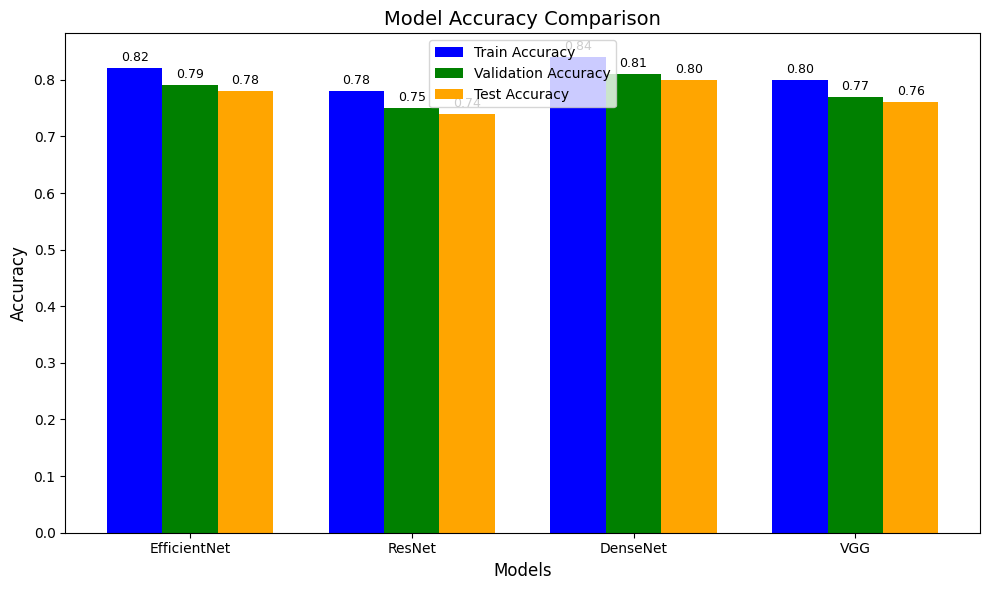

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: Replace these values with your model results
models = ['EfficientNet', 'ResNet', 'DenseNet', 'VGG']
train_accuracy = [0.82, 0.78, 0.84, 0.80]  # Replace with actual train accuracy
val_accuracy = [0.79, 0.75, 0.81, 0.77]    # Replace with actual validation accuracy
test_accuracy = [0.78, 0.74, 0.80, 0.76]   # Replace with actual test accuracy

# Plot bar chart
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, train_accuracy, width, label='Train Accuracy', color='blue')
bar2 = ax.bar(x, val_accuracy, width, label='Validation Accuracy', color='green')
bar3 = ax.bar(x + width, test_accuracy, width, label='Test Accuracy', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Model Accuracy Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend()

# Add accuracy values above bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

add_values(bar1)
add_values(bar2)
add_values(bar3)

# Show the plot
plt.tight_layout()
plt.show()
